In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display as ICD
import seaborn as sns
import glob
import scipy
import os
pd.set_option('display.max_columns', 100)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
DATA_FOLDER = './avg_data/'
os.listdir(DATA_FOLDER)
all_anem=glob.glob(DATA_FOLDER + "anem*")
mast_anem=all_anem[:6]
top_anem=all_anem[6]
only_mag=True
h=np.arange(1.5,22,4)
df_list=[]
for idx,i in enumerate(mast_anem):
    df_temp=pd.read_csv(i, sep=" ", header=None, index_col=0, names=['u','direction'])
    df_temp['h']=h[idx]
    df_list.append(df_temp)
mast_anem_df = pd.concat(df_list)
rad_df = pd.read_csv(DATA_FOLDER+'radiometer.csv', sep=" ",index_col=0)
temp_df = pd.read_csv(DATA_FOLDER+'surf_temp.txt', sep=" ",index_col=0)
top_anem_df = pd.read_csv(top_anem, sep=" ",index_col=0,names=['u_top','direction_top'])
time_var_df = top_anem_df.merge(rad_df,how='left', left_index=True,right_index=True)
time_var_df = time_var_df.merge(temp_df,how='left', left_index=True,right_index=True)
tot_df=mast_anem_df.merge(time_var_df,how='left', left_index=True,right_index=True)
tot_df = tot_df.dropna(axis=0, how='any')
tot_df = tot_df.drop(columns=['Albedo [-]'])
tot_df

,u,direction,h,u_top,direction_top,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Radiometer Ground temperature [°C],Sensor Ground temperature [°C],North temperature [°C],East temperature [°C],South temperature [°C],West temperature [°C]
2018-11-14 00:00:00,0.66,160.0,1.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.91,225.0,5.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.57,185.0,9.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.64,284.0,13.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.98,313.0,17.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.71,328.0,21.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.69,187.0,1.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.99,272.0,5.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.61,248.0,9.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,2.25,281.0,13.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5


### Built in house categorization

In [ ]:
def categorization_index(feature, bin_):
    feature = np.array(feature)
    bin_ = np.array(bin_)
    feature_cat = np.copy(feature)
    for i in range(0,feature.shape[1]):
        cut = pd.cut(feature[:,i],bin_[i])
        index = cut.codes
        feature_cat[:,i] = index
    return feature_cat

In [ ]:
bin_ = 20*np.ones(19)
data = tot_df.iloc[:,0:-1]
cat = categorization_index(data, bin_)
plt.figure()
plt.plot(cat[:,0])
plt.figure()
plt.plot(np.array(data)[:,0])
cat = cat.astype(int)
print cat

In [ ]:
train = np.array(cat[0:-1])
train.shape

#### Wind speed direction decomposition

Transform absolute value and direction in vector components

In [3]:
# create columns with coordinate velocities output
tot_df['u_x']=tot_df['u']*np.cos(np.radians(tot_df['direction']))
tot_df['u_y']=tot_df['u']*np.sin(np.radians(tot_df['direction']))

In [4]:
# create columns with coordinate velocities input top mast anemometer
tot_df['u_top_x']=tot_df['u_top']*np.cos(np.radians(tot_df['direction_top']))
tot_df['u_top_y']=tot_df['u_top']*np.sin(np.radians(tot_df['direction_top']))

In [5]:
# drop the columns which are not used anymore
tot_df=tot_df.drop(columns=['u', 'u_top', 'direction', 'direction_top'])

In [6]:
tot_df.head()

,h,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Radiometer Ground temperature [°C],Sensor Ground temperature [°C],North temperature [°C],East temperature [°C],South temperature [°C],West temperature [°C],u_x,u_y,u_top_x,u_top_y
2018-11-14 00:00:00,1.5,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5,-0.620197,0.225733,1.295742,-2.436935
2018-11-14 00:00:00,5.5,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5,-0.643467,-0.643467,1.295742,-2.436935
2018-11-14 00:00:00,9.5,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5,-0.567831,-0.049679,1.295742,-2.436935
2018-11-14 00:00:00,13.5,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5,0.638674,-2.561581,1.295742,-2.436935
2018-11-14 00:00:00,17.5,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5,2.032355,-2.179434,1.295742,-2.436935


### Splitting the data

In [7]:
X = np.array(tot_df.drop(columns=['u_x', 'u_y']))
y = np.array(tot_df[['u_x', 'u_y']])

In [8]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

### Categorization with scikit

In [9]:
est = KBinsDiscretizer(n_bins=[20, 20], encode='ordinal',strategy='kmeans').fit(y_tr)
y_trans=est.transform(y_tr)  
ICD.display(pd.Series(y_trans[:,0]).describe())
ICD.display(pd.Series(y_trans[:,1]).describe())

count    6768.000000
mean        7.792553
std         3.684160
min         0.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        19.000000
dtype: float64

count    6768.000000
mean        8.635491
std         3.600932
min         0.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        19.000000
dtype: float64

In [ ]:
plt.subplot(121)
sns.distplot(y_trans[:,0] )
plt.subplot(122)
sns.distplot(y_trans[:,1] )

Checking the values of the means

In [ ]:
np.mean(y_trans[:,0])
np.mean(y_trans[:,1])

## Neural Network Implementation 4

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#define mean and standard based on the test data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled=scaler.transform(X_tr)

In [28]:
#categorize
x_train = X_tr
y_train = y_trans

In [12]:
# non categorize
x_train = X_tr_scaled
y_train = y_tr

In [13]:
# H is hidden dimension of the weight matrix which is inside the layer/s;
# D_out is output dimension.
D_in, H, D_out = X_tr.shape[1], 1, y_train.shape[1]

In [29]:
# define model
model = Sequential()
# 12 neurons
model.add(Dense(20, input_dim=D_in, activation='linear'))
model.add(Dense(20, activation='sigmoid'))
# D_out output
model.add(Dense(D_out, activation='linear'))

In [30]:
for layer in model.layers:
    print(layer.output_shape)

(None, 20)
(None, 20)
(None, 2)


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                360       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 42        
Total params: 822
Trainable params: 822
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=200, batch_size=1000)

Epoch 1/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0204 - acc: 0.6166
Epoch 2/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0204 - acc: 0.6166
Epoch 3/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0203 - acc: 0.6166
Epoch 4/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0203 - acc: 0.6166
Epoch 5/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0202 - acc: 0.6166
Epoch 6/200
6768/6768 [==============================] - 0s 4us/step - loss: 13.0202 - acc: 0.6166
Epoch 7/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0199 - acc: 0.6166
Epoch 8/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0199 - acc: 0.6166
Epoch 9/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0197 - acc: 0.6166
Epoch 10/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0197 - acc: 0.6166
Epoch 11/

6768/6768 [==============================] - 0s 3us/step - loss: 13.0128 - acc: 0.6166
Epoch 84/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0127 - acc: 0.6166
Epoch 85/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0127 - acc: 0.6166
Epoch 86/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0128 - acc: 0.6166
Epoch 87/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0124 - acc: 0.6166
Epoch 88/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0123 - acc: 0.6166
Epoch 89/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0122 - acc: 0.6166
Epoch 90/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0122 - acc: 0.6166
Epoch 91/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0120 - acc: 0.6166
Epoch 92/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0121 - acc: 0.6166
Epoch 93/200


6768/6768 [==============================] - 0s 3us/step - loss: 13.0054 - acc: 0.6166
Epoch 165/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0052 - acc: 0.6166
Epoch 166/200
6768/6768 [==============================] - 0s 2us/step - loss: 13.0051 - acc: 0.6166
Epoch 167/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0052 - acc: 0.6166
Epoch 168/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0050 - acc: 0.6166
Epoch 169/200
6768/6768 [==============================] - 0s 2us/step - loss: 13.0050 - acc: 0.6166
Epoch 170/200
6768/6768 [==============================] - 0s 2us/step - loss: 13.0048 - acc: 0.6166
Epoch 171/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0047 - acc: 0.6166
Epoch 172/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0045 - acc: 0.6166
Epoch 173/200
6768/6768 [==============================] - 0s 3us/step - loss: 13.0047 - acc: 0.6166
Epoc

In [35]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6768/6768 [==============================] - 0s 18us/step

acc: 61.66%


array([[7.892986, 8.613743],
       [7.892987, 8.613743],
       [7.892987, 8.613743],
       ...,
       [7.892987, 8.613743],
       [7.892987, 8.613743],
       [7.892987, 8.613743]], dtype=float32)

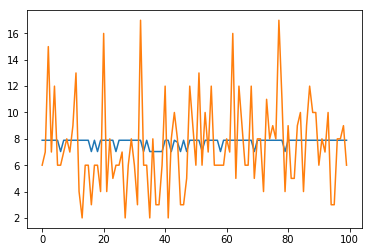

In [36]:
# calculate predictions
predictions = model.predict(x_train)
# round predictions
rounded = np.array([x for x in predictions])
plt.plot(rounded[:100,0])
plt.plot(y_train[:100,0])
rounded

## Neural Network Implementation 3

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler

In [ ]:
#define mean and standard based on the test data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled=scaler.transform(X_tr)

In [ ]:
#categorize
x_train = torch.from_numpy(X_tr)
y_train = torch.from_numpy(y_trans)

In [ ]:
# non categorize
x_train = torch.from_numpy(X_tr_scaled)
y_train = torch.from_numpy(y_tr)

In [ ]:
# check the type of tensor
y_train
sns.kdeplot(x_train.data.numpy()[:,-2])

In [ ]:
# H is hidden dimension of the weight matrix which is inside the layer/s;
# D_out is output dimension.
D_in, H, D_out = X_tr.shape[1], 1, y_train.shape[1]

In [ ]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias. Basically it is a sequence\
# of activation functions to apply sequentially to input to within the layer and to the output

# the sequence are three functions since this is a two layerd net
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [ ]:
x=x_train
y=y_train

In [ ]:

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x.type(torch.FloatTensor))

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y.type(torch.FloatTensor))
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

In [ ]:
plt.plot(y_pred.data.numpy()[:,1])
y_pred.data.numpy()[:,0]
y_pred.data.numpy()[:,1]

## Neural Network Implementation 2

In [ ]:
import torch
import torch.nn as nn

Considerations on Batch Size:

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated through all samples of the network. A problem usually happens with the last set of samples. In our example we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.
Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.
Disadvantages of using a batch size < number of all samples:

The smaller the batch the less accurate the estimate of the gradient will be. In the figure below you can see that the direction of the mini-batch gradient (green color) fluctuates much more in comparison to the direction of the full batch gradient (blue color).

[link](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network)

In [ ]:
# define the size of the layer and the batch size

# n_in is the shape of the feature matrix X
# n_h is the number of layers 
# n_out is the number of output
# batch_size defines the number of samples that will be propagated through the network.

n_in, n_h, n_out, batch_size = X_tr.shape[1], 5, y_tr.shape[1], 50

Transform the numpy array in Pytorch arrays

In [ ]:
x_train = torch.from_numpy(X_tr)
y_train = torch.from_numpy(y_trans)

In [ ]:
y_train

This creates a model that looks like input -> linear -> relu -> linear.

In [ ]:
model = nn.Sequential(nn.Linear(n_in, n_h),
                     nn.Sigmoid(),
                     nn.Linear(n_h, n_out))

Construct Loss function

In [ ]:
criterion = torch.nn.MSELoss

Define our optimizer. We use Stochastic Gradient Descent 

In [ ]:
# lr is the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train the network for 10000 epochs. This does the forward propagation, loss computation, backward propagation and parameter updation in that sequence.

In [ ]:
for epoch in range(1000):
    
    # Forward Propagation
    y_pred = model(x_train.type(torch.FloatTensor))
    
    # Compute and print loss
    loss = criterion(y_pred, y_train.type(torch.FloatTensor))
    print('epoch: ', epoch,' loss: ', loss.item())
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

In [ ]:
plt.plot(y_pred.data.numpy()[:,0])

## Neural Network Implementation 1

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F      # activation function
import matplotlib.pyplot as plt

In [ ]:
x_train = train[:,3]
print x_train.shape
y_train = np.array(train[:,1])
print y_train.shape
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
print y_train.shape

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  
        self.predict = torch.nn.Linear(n_hidden, n_output)  

    def forward(self, x):
        a1 = F.relu(self.hidden(x)) 
        #a1 = torch.sigmoid(self.hidden(x))
        #a1 = self.hidden(x) # 隐藏层用 relu
        y = self.predict(a1)
        return y

net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

In [ ]:
loss_func = torch.nn.MSELoss()   
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

In [ ]:
x_train, y_train = Variable(x_train), Variable(y_train)
x_train = x_train.type(torch.FloatTensor)
y_train = y_train.type(torch.FloatTensor)
print x_train
x_train = Variable(x_train)
y_train = Variable(y_train)
print x_train.size()
print y_train.size()
y_train = y_train.view(8459, 1) 
x_train = x_train.view(8459, 1)
print y_train

In [ ]:
for t in range(1000):
    prediction = net(x_train)
    loss = loss_func(prediction, y_train)

    optimizer.zero_grad()    # clear gradients for next train
    loss.backward()          # backpropagation
    optimizer.step()         # update（w、b）

In [ ]:
print loss
net.eval()
predict = net(Variable(x_train))
predict = predict.data.numpy()

In [ ]:
print np.unique(predict)

In [ ]:
plt.plot(predict)

In [ ]:
plt.plot(np.array(y_train))